In [1]:
import xarray as xr 
import glob 
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import linregress

import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback/')
import functions.data_wrangling as data 
import functions.plotting as plot
import functions.eddy_feedback as ef

# !! OLD VERSION

This is my old version, calculated using daily data. See [this notebook](/home/users/cturrell/documents/eddy_feedback/reproduce/eddy_feedback_param/pamip_efp.ipynb) or [this one](./monthly_fig2b.ipynb) for the most recent and correct version.

In [2]:
print('Loading AWI...')
awi = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/pdSST-pdSIC_3x3/3x3_ef_AWI.nc')
awi_efp_north = ef.calculate_efp_pamip(awi)
awi_efp_south = ef.calculate_efp_pamip(awi, calc_south_hemis=True)
print('AWI Loaded and Calculated.')

print('Loading CNRM...')
cnrm = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/pdSST-pdSIC_3x3/3x3_ef_CNRM.nc')
cnrm_efp_north = ef.calculate_efp_pamip(cnrm)
cnrm_efp_south = ef.calculate_efp_pamip(cnrm, calc_south_hemis=True)
print('CNRM Loaded and Calculated.')

print('Loading FGOALS...')
fgoals = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/pdSST-pdSIC_3x3/3x3_ef_FGOALS.nc')
fgoals_efp_north = ef.calculate_efp_pamip(fgoals)
fgoals_efp_south = ef.calculate_efp_pamip(fgoals, calc_south_hemis=True)
print('FGOALS Loaded and Calculated.')

print('Loading CanESM...')
can = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/pdSST-pdSIC_3x3/3x3_ef_CanESM5.nc')
can_efp_north = ef.calculate_efp_pamip(can)
can_efp_south = ef.calculate_efp_pamip(can, calc_south_hemis=True)
print('CanESM Loaded and Calculated.')

print('Loading MIROC...')
miroc = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/pdSST-pdSIC_3x3/3x3_ef_MIROC.nc')
miroc_efp_north = ef.calculate_efp_pamip(miroc)
miroc_efp_south = ef.calculate_efp_pamip(miroc, calc_south_hemis=True)
print('MIROC Loaded and Calculated.')

print('Loading IPSL...')
ipsl = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/pdSST-pdSIC_3x3/3x3_ef_IPSL.nc')
ipsl_efp_north = ef.calculate_efp_pamip(ipsl)
ipsl_efp_south = ef.calculate_efp_pamip(ipsl, calc_south_hemis=True)
print('IPSL Loaded and Calculated.')

print('Loading HadGEM-MM...')
had = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/pdSST-pdSIC_3x3/3x3_ef_HadGEM.nc')
had_efp_north = ef.calculate_efp_pamip(had)
had_efp_south = ef.calculate_efp_pamip(had, calc_south_hemis=True)
print('HadGEM-MM Loaded and Calculated.')

Loading AWI...
AWI Loaded and Calculated.
Loading CNRM...


/home/users/cturrell/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


CNRM Loaded and Calculated.
Loading FGOALS...


/home/users/cturrell/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


FGOALS Loaded and Calculated.
Loading CanESM...
CanESM Loaded and Calculated.
Loading MIROC...


/home/users/cturrell/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


MIROC Loaded and Calculated.
Loading IPSL...


/home/users/cturrell/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


IPSL Loaded and Calculated.
Loading HadGEM-MM...
HadGEM-MM Loaded and Calculated.


/home/users/cturrell/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [3]:
# Regression line
x = [awi_efp_south, cnrm_efp_south, can_efp_south, had_efp_south, ipsl_efp_south, miroc_efp_south, fgoals_efp_south]
y = [awi_efp_north, cnrm_efp_north, can_efp_north, had_efp_north, ipsl_efp_north, miroc_efp_north, fgoals_efp_north]
m,b = np.polyfit(x,y, 1)

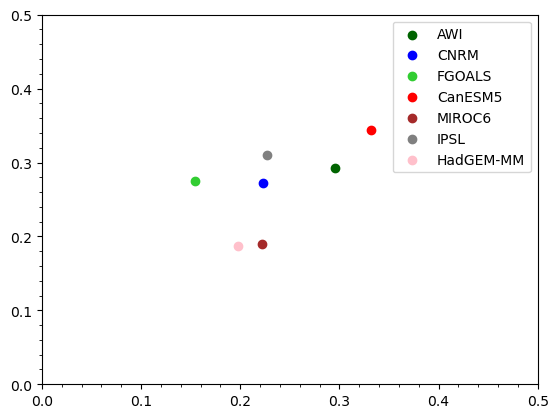

In [4]:
plt.figure()

plt.scatter(awi_efp_south, awi_efp_north, color='darkgreen', label='AWI')
plt.scatter(cnrm_efp_south, cnrm_efp_north, color='blue', label='CNRM')
plt.scatter(fgoals_efp_south, fgoals_efp_north, color='limegreen', label='FGOALS')
plt.scatter(can_efp_south, can_efp_north, color='red', label='CanESM5')
plt.scatter(miroc_efp_south, miroc_efp_north, color='brown', label='MIROC6')
plt.scatter(ipsl_efp_south, ipsl_efp_north, color='gray', label='IPSL')
plt.scatter(had_efp_south, had_efp_north, color='pink', label='HadGEM-MM')

plt.xlim([0,0.5])
plt.ylim([0,0.5])

plt.minorticks_on()
plt.legend()
plt.show()

### Seaborn

In [5]:
import seaborn as sns
import pandas as pd
import scipy as sp

In [6]:
# create DataFrame for Seaborn
EFP_south = [awi_efp_south, can_efp_south, cnrm_efp_south, fgoals_efp_south, had_efp_south, ipsl_efp_south, miroc_efp_south]
EFP_north = [awi_efp_north, can_efp_north, cnrm_efp_north, fgoals_efp_north, had_efp_north, ipsl_efp_north, miroc_efp_north]
model_name = ['AWI', 'CanESM', 'CNRM', 'FGOALS', 'HadGEM-MM', 'IPSL', 'MIROC']

d = {'model_name': model_name, 'EFP_north': EFP_north, 'EFP_south': EFP_south}
df = pd.DataFrame(d)
df 

,model_name,EFP_north,EFP_south
0,AWI,0.2926,0.2957
1,CanESM,0.3445,0.3323
2,CNRM,0.2717,0.2231
3,FGOALS,0.2754,0.1539
4,HadGEM-MM,0.1866,0.1974
5,IPSL,0.3102,0.2274
6,MIROC,0.1896,0.2220


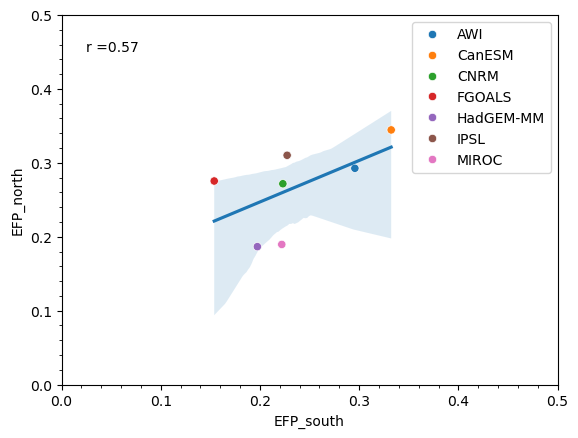

In [7]:
sns.regplot(data=df, x='EFP_south', y='EFP_north', scatter_kws={'color': 'white'})
sns.scatterplot(data=df, x='EFP_south', y='EFP_north', hue='model_name')

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=EFP_south, y=EFP_north)
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r), transform=ax.transAxes)

plt.xlim([0,0.5])
plt.ylim([0,0.5])

plt.minorticks_on()
plt.legend()
plt.show()

# Isca

In [8]:
isca = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/isca_data/realistic_V2_uvt_ubar_ep-both.nc',
                         parallel=True, chunks={'time':30})
isca = data.seasonal_mean(isca, cut_ends=False, season='djf')
isca = isca.isel(time=slice(1,-1))
efp_isca_north = ef.calculate_efp(isca, take_seasonal=False)
efp_isca_south = ef.calculate_efp(isca, calc_south_hemis=True, take_seasonal=False)

Seasonal average has not been calculated.

Seasonal average has not been calculated.



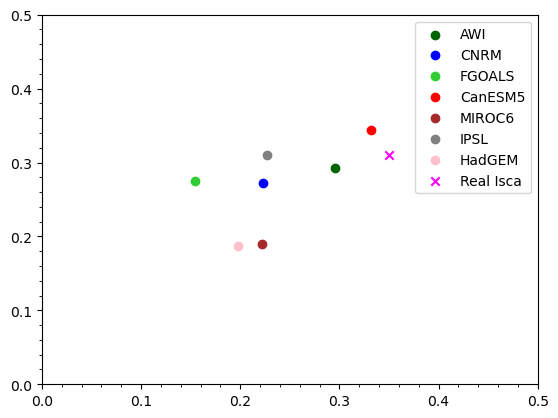

In [9]:
plt.figure()

# Plot PAMIP data
plt.scatter(awi_efp_south, awi_efp_north, color='darkgreen', label='AWI')
plt.scatter(cnrm_efp_south, cnrm_efp_north, color='blue', label='CNRM')
plt.scatter(fgoals_efp_south, fgoals_efp_north, color='limegreen', label='FGOALS')
plt.scatter(can_efp_south, can_efp_north, color='red', label='CanESM5')
plt.scatter(miroc_efp_south, miroc_efp_north, color='brown', label='MIROC6')
plt.scatter(ipsl_efp_south, ipsl_efp_north, color='gray', label='IPSL')
plt.scatter(had_efp_south, had_efp_north, color='pink', label='HadGEM')


# Plot Isca data
plt.scatter(efp_isca_south, efp_isca_north, color='fuchsia', marker='x', label='Real Isca')

plt.xlim([0,0.5])
plt.ylim([0,0.5])

plt.minorticks_on()
plt.legend()
plt.show()

### Seaborn

In [10]:
import seaborn as sns
import pandas as pd
import scipy as sp

In [11]:
# create DataFrame for Seaborn
EFP_south = [awi_efp_south, can_efp_south, cnrm_efp_south, fgoals_efp_south, had_efp_south, ipsl_efp_south, miroc_efp_south, efp_isca_south]
EFP_north = [awi_efp_north, can_efp_north, cnrm_efp_north, fgoals_efp_north, had_efp_north, ipsl_efp_north, miroc_efp_north, efp_isca_north]
model_name = ['AWI', 'CanESM', 'CNRM', 'FGOALS', 'HadGEM-MM', 'IPSL', 'MIROC', 'Isca']

d = {'model_name': model_name, 'EFP_south': EFP_south, 'EFP_north': EFP_north}
df = pd.DataFrame(d)
df 

,model_name,EFP_south,EFP_north
0,AWI,0.2957,0.2926
1,CanESM,0.3323,0.3445
2,CNRM,0.2231,0.2717
3,FGOALS,0.1539,0.2754
4,HadGEM-MM,0.1974,0.1866
5,IPSL,0.2274,0.3102
6,MIROC,0.2220,0.1896
7,Isca,0.3500,0.3100


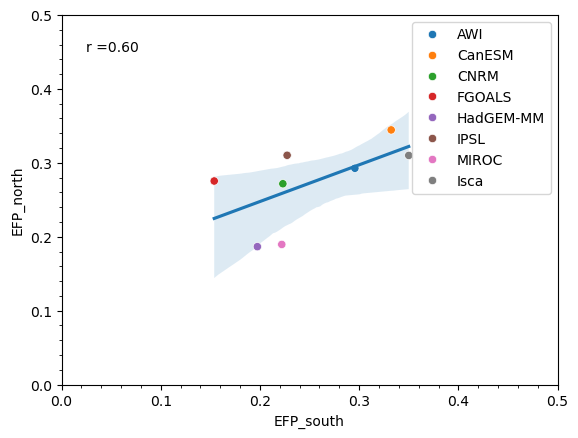

In [12]:
sns.regplot(data=df, x='EFP_south', y='EFP_north', scatter_kws={'color': 'white'})
sns.scatterplot(data=df, x='EFP_south', y='EFP_north', hue='model_name')

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=EFP_south, y=EFP_north)
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r), transform=ax.transAxes)

plt.xlim([0,0.5])
plt.ylim([0,0.5])

plt.minorticks_on()
plt.legend()
plt.show()